In [1]:
import pandas as pd
df1 = pd.read_csv("otomoto.csv")
df2 = pd.read_csv("otomoto_partial.csv")

# Combine the two DataFrames
df_combined = pd.concat([df1, df2])

# Remove duplicate rows
df_combined = df_combined.drop_duplicates()

# Display the shape of the combined DataFrame
print(f"Combined DataFrame shape: {df_combined.shape}")

Combined DataFrame shape: (5100, 12)


In [2]:
import pandas as pd
df_fixed = pd.read_csv("otomoto_fixed.csv")

# Combine the two DataFrames
df_combined = pd.concat([df_combined, df_fixed])

# Remove duplicate rows
df_combined = df_combined.drop_duplicates()
df_combined = df_combined.dropna()
categorical_columns = df_combined.select_dtypes(include=['object']).columns
numerical_columns = df_combined.select_dtypes(include=['float64', 'int64']).columns

for col in categorical_columns:
    print(f"{col}: {df_combined[col].nunique()} unique values")
    print(df_combined[col].unique())
df_combined.shape

Brand: 54 unique values
['Ford' 'Honda' 'Volvo' 'BMW' 'Cupra' 'Opel' 'Peugeot' 'Porsche' 'Audi'
 'Toyota' 'Fiat' 'Mercedes-Benz' 'Skoda' 'Seat' 'Kia' 'Land Rover'
 'Renault' 'Nissan' 'Volkswagen' 'MINI' 'Hyundai' 'Mazda' 'Jeep' 'RAM'
 'Alfa Romeo' 'Suzuki' 'MG' 'Chevrolet' 'Citroën' 'Subaru' 'Lexus'
 'SsangYong/KGM' 'Abarth' 'Baic' 'Mitsubishi' 'Aston Martin' 'Dacia'
 'DFSK' 'Infiniti' 'Maserati' 'Omoda' 'Jaguar' 'Jaecoo' 'Chrysler' 'Dodge'
 'Isuzu' 'Saab' 'Smart' 'BYD' 'DS Automobiles' 'GMC' 'Bentley' 'Buick'
 'Forthing']
Model: 466 unique values
['Ranger' 'CR-V' 'XC 60' 'Focus' 'Seria 1' 'Formentor' 'Mokka' '5008'
 'Seria 3' 'Cayenne' 'A5' 'Land Cruiser' 'Astra' 'Bravo' 'Proace Verso'
 'Klasa E' 'Q5' 'Kamiq' 'GLC' 'Ateca' 'Optima' 'Range Rover Sport'
 'Kangoo' 'Qashqai' 'Passat' '2008' 'Countryman' 'Kodiaq' 'Seria 2'
 'Tucson' 'X6' 'CX-3' 'Q7' 'A7' 'S5' 'Karoq' 'Sportage' 'Combo' 'Compass'
 '1500' 'A3' 'Golf Plus' 'Giulia' 'Touran' 'X7' 'S-Max' 'Superb' 'A6'
 'ix35' 'Elantra' 'Q3' 'O

(3743, 12)

In [13]:
df_combined.to_csv("data.csv", index=False)

In [15]:
import pandas as pd
import numpy as np
import re

# Load dataset
df = pd.read_csv("data.csv")  # or the correct path to your file

def clean_numeric(series, remove_text=None):
    series = series.astype(str).str.replace(" ", "").str.replace("\xa0", "")
    if remove_text:
        series = series.str.replace(remove_text, "", regex=False)
    return pd.to_numeric(series.str.replace(",", "."), errors="coerce")

# Helper: extract numeric values from strings like "150 KM", "brak", etc.
def extract_number(text):
    if isinstance(text, str):
        match = re.search(r"\d+", text)
        if match:
            return int(match.group())
    elif isinstance(text, (int, float)):
        return text
    return np.nan

# Apply cleaning to columns
df["Mileage"] = clean_numeric(df["Mileage"], "km")
df["Engine Size"] = clean_numeric(df["Engine Size"], "cm3")
df["Horsepower"] = df["Horsepower"].apply(extract_number)
df["Price"] = clean_numeric(df["Price"])

# Drop rows with missing critical values (optional)
df = df.dropna(subset=["Mileage", "Engine Size", "Horsepower", "Price"])

# Check results
print(df[["Mileage", "Engine Size", "Horsepower", "Price"]].describe())
df.shape


             Mileage  Engine Size   Horsepower         Price
count    3743.000000  3743.000000  3743.000000  3.743000e+03
mean   102773.517232  1927.044082   121.833289  1.261038e+05
std     96794.704828   726.899905   102.920286  1.262606e+05
min         1.000000   796.000000     1.000000  2.150000e+03
25%      6092.000000  1498.000000    27.000000  4.594950e+04
50%     89900.000000  1968.000000   116.000000  8.979000e+04
75%    169000.000000  1996.500000   179.000000  1.644860e+05
max    999999.000000  6801.000000   999.000000  1.379000e+06


(3743, 12)

In [78]:
color_mapping = {
    "Szary": "Ciemne", "Niebieski": "Ciemne", "Czerwony": "Ciemne", "Brązowy": "Ciemne",
    "Czarny": "Ciemne", "Granatowy": "Ciemne", "Zielony": "Ciemne", "Bordowy": "Ciemne",
    "Fioletowy": "Ciemne", "Biały": "Jasne", "Srebrny": "Jasne", "Beżowy": "Jasne",
    "Złoty": "Jasne", "Pomarańczowy": "Jasne", "Żółty": "Jasne", "Błękitny": "Jasne",
    "Inny kolor": "Jasne"
};

df["Color"] = df["Color"].map(color_mapping);
df = df.drop(columns=["Color"]);
df.head()

,Brand,Model,Year,Mileage,Fuel Type,Transmission,Engine Size,Horsepower,Price,Description,URL,Color Category
1,Honda,CR-V,2012.0,169000,Benzyna,Manualna,1997,169,55800.0,"Szanowni PaństwoMiło nam poinformować, że dołą...",https://www.otomoto.pl/osobowe/oferta/honda-cr...,Jasne
2,Volvo,XC 60,2022.0,100000,Diesel,Automatyczna,1969,100,161800.0,! ! ! NAJŁADNIEJSZA WERSJA R-DESIGN + KOŁA 21'...,https://www.otomoto.pl/osobowe/oferta/volvo-xc...,Ciemne
3,Ford,Focus,2025.0,1,Hybryda,Automatyczna,999,1,102500.0,OFEROWANY SAMOCHÓD:- Ford Focus- Silnik: 999- ...,https://www.otomoto.pl/osobowe/oferta/ford-foc...,Ciemne
4,BMW,Seria 1,2017.0,119751,Benzyna,Automatyczna,1499,119,62900.0,BMW 118i M SportSilnik: Turbo benzyna 1.5 o mo...,https://www.otomoto.pl/osobowe/oferta/bmw-seri...,Ciemne
6,BMW,Seria 1,2017.0,85285,Benzyna,Automatyczna,1499,85,60800.0,Samochód zarejestrowany i ubezpieczony w kraju...,https://www.otomoto.pl/osobowe/oferta/bmw-seri...,Ciemne


In [70]:
unique_colors = df["Color"].unique()
print(unique_colors)

[nan]


In [80]:
def apply_iqr_filter(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in ["Price", "Mileage", "Engine Size", "Horsepower"]:
    df = apply_iqr_filter(df, col)

print(f"Final shape after IQR filtering: {df.shape}")

Final shape after IQR filtering: (3148, 12)


In [82]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=["Price", "Description", "URL", "Horsepower"])
y = df["Price"]

# First split: test (15%) + temp (85%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second split: train (70%) + val (15%) from temp
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)  # 0.1765 ≈ 15/85

# Check final shapes
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (2202, 8)
Validation: (473, 8)
Test: (473, 8)


MAE: 14896.888192065962
RMSE: 21480.022424621333
R²: 0.903136412077629


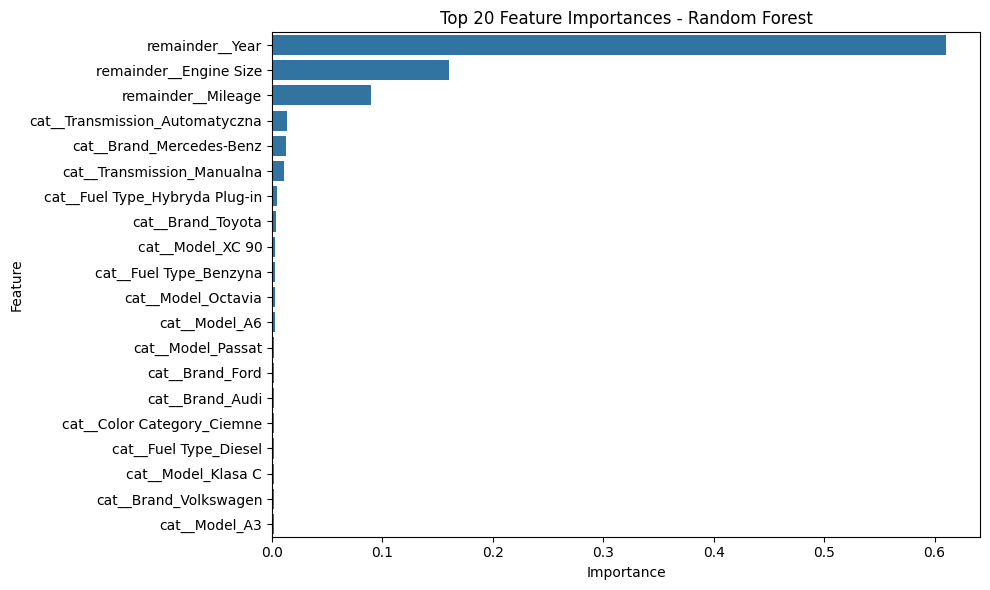

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))
)
print("R²:", r2_score(y_test, y_pred))

# Feature importances
rf = model.named_steps["randomforestregressor"]
feature_names = model.named_steps["columntransformer"].get_feature_names_out()
importances = rf.feature_importances_

# Визуализация
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values("Importance", ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Top 20 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Определим категориальные и числовые фичи
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Препроцессор
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# Пайплайн
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Сетка параметров для перебора
param_grid = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [10, 20, 30, 40, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4],
    "regressor__max_features": ["auto", "sqrt", "log2"]
}


# GridSearch
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
    verbose=2
)

# Запуск
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Best Parameters:", grid_search.best_params_)

# Оценка на validation set
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
y_val_pred = grid_search.predict(X_val)

print("Validation MAE:", mean_absolute_error(y_val, y_val_pred))
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("Validation R²:", r2_score(y_val, y_val_pred))

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


C:\Users\Viktor\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Viktor\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Viktor\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Viktor\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py", line 662, in

Best Parameters: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Validation MAE: 16593.388922500442
Validation RMSE: 24145.11087918708
Validation R²: 0.8918413443572921


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint
import numpy as np

# Категориальные и числовые признаки
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Препроцессор
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# Пайплайн
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Параметры для случайного поиска
param_grid = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [10, 20, 30, 40, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4],
    "regressor__max_features": ["auto", "sqrt", "log2"]
}


# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=20,  # можно увеличить для более точного поиска
    cv=3,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
    random_state=42,
    verbose=2
)

# Запуск
random_search.fit(X_train, y_train)

# Лучшие параметры
print("Best Parameters:", random_search.best_params_)

# Оценка на валидационном сете
y_val_pred = random_search.predict(X_val)

print("Validation MAE:", mean_absolute_error(y_val, y_val_pred))
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))
print("Validation R²:", r2_score(y_val, y_val_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\Viktor\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Viktor\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Viktor\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Viktor\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py", line 662, in fit


Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None}
Validation MAE: 17614.847620911252
Validation RMSE: 25264.16692230374
Validation R²: 0.8815833320637377


In [84]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

cat_features = X_train.select_dtypes(include=["object"]).columns.tolist()

cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric="MAE",
    early_stopping_rounds=50,
    verbose=100,
    random_seed=42
)

# 3. Обучаем модель (CatBoost сам справляется с категориальными признаками)
cat_model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    use_best_model=True
)

# 4. Предсказания
y_pred_cat = cat_model.predict(X_test)


# 5. Метрики
print("MAE:", mean_absolute_error(y_test, y_pred_cat))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat)))
print("R²:", r2_score(y_test, y_pred_cat))

0:	learn: 52797.8809350	test: 54496.2528128	best: 54496.2528128 (0)	total: 47ms	remaining: 47s
100:	learn: 15360.4981746	test: 15073.9538941	best: 15073.9538941 (100)	total: 5.99s	remaining: 53.3s
200:	learn: 13571.1003486	test: 13921.3716302	best: 13921.3716302 (200)	total: 12.2s	remaining: 48.6s
300:	learn: 12496.2760308	test: 13492.6592859	best: 13490.3422529 (299)	total: 18.1s	remaining: 42.1s
400:	learn: 11744.0499148	test: 13319.7666286	best: 13319.0253084 (398)	total: 24.4s	remaining: 36.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 13258.98663
bestIteration = 448

Shrink model to first 449 iterations.
MAE: 14054.889480991005
RMSE: 19966.94991875387
R²: 0.916302102591668


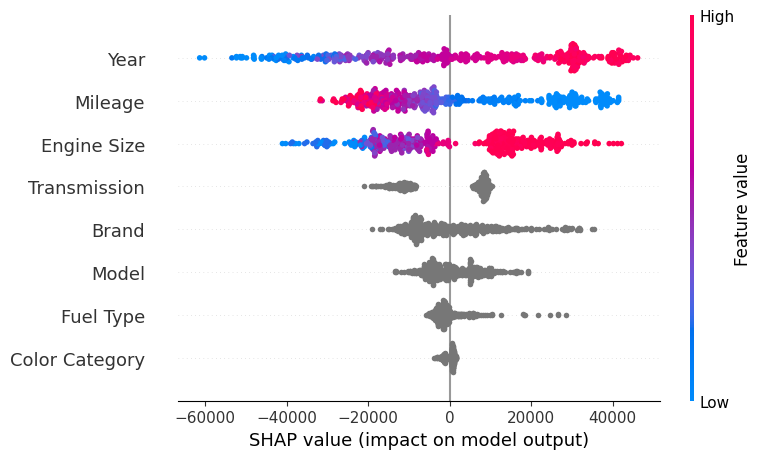

In [85]:
import shap
import matplotlib.pyplot as plt

# Убедись, что модель обучена: cat_model
# И данные у тебя разделены: X_train, X_val, X_test

# === SHAP ===
explainer_shap = shap.TreeExplainer(cat_model)
shap_values = explainer_shap.shap_values(X_test)

# Глобальное важность признаков
shap.summary_plot(shap_values, X_test)

# Объяснение одной строки
shap.initjs()
shap.force_plot(explainer_shap.expected_value, shap_values[0], X_test.iloc[0])



In [62]:
X_test.head()

,Brand,Model,Year,Mileage,Fuel Type,Transmission,Engine Size
3511,Toyota,Avensis,2015.0,62400,Diesel,Manualna,1598
128,Peugeot,3008,2016.0,63900,Diesel,Manualna,1997
1018,SsangYong/KGM,Torres,2024.0,11,Benzyna,Automatyczna,1497
1025,Volkswagen,Passat,2025.0,5,Diesel,Automatyczna,1968
1191,Audi,Q7,2020.0,71920,Benzyna,Automatyczna,1998


In [63]:
def predict_car(cat_model, encoder, cat_features, input_dict):
    import pandas as pd

    # Создаем DataFrame из словаря
    df = pd.DataFrame([input_dict])

    # Приводим числовые значения
    df["Engine Size"] = df["Engine Size"].astype(str).str.replace(" ", "").astype(int)
    df["Mileage"] = df["Mileage"].astype(str).str.replace(" ", "").astype(int)
    df["Year"] = df["Year"].astype(float)  # в твоих данных это float

    # Кодируем категориальные признаки, как на тренировке
    df_encoded = df.copy()
    df_encoded[cat_features] = encoder.transform(df[cat_features])
    df_encoded[cat_features] = df_encoded[cat_features].astype(str)  # CatBoost принимает строки

    # Предсказание
    price = cat_model.predict(df_encoded)[0]
    print(f"💰 Предсказанная цена: {int(price):,} zł")
    return price
predict_car(
    cat_model=cat_model,
    encoder=encoder,
    cat_features=cat_features,
    input_dict={
        "Brand": "Ford",
        "Model": "Focus",
        "Year": 2015,
        "Mileage": "102 000",
        "Fuel Type": "Benzyna",
        "Transmission": "Manualna",
        "Engine Size": "1 498",
    }
)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Color


In [ ]:
df.df_to_csv("final_model.csv", index=False)